# Exploratory Analysis Part 2

In part 1, we explored what factors could lead to the changes in price level of HDB prices. For the purposes of this exploration part 2, I have filtered HDBs that are purely residential. This is in order to create the bid rent curve for urban economics analysis purposes. 

But before that it is important to ensure all the econometrics assumptions have been met. In this notebook, each assumption is explored and analysed. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from collections import Counter
import time
pd.options.mode.chained_assignment = None  # default='warn'
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
residential = pd.read_csv('residential.csv', low_memory=False)

In [3]:
residential.columns

Index(['month', 'town', 'flat_type', 'blk_no', 'street', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'market_hawker', 'miscellaneous',
       'multistorey_carpark', 'precinct_pavilion', 'bldg_contract_town',
       'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold',
       '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'building', 'addr', 'Postal', 'SUBZONE_NO',
       'SUBZONE_N', 'PLN_AREA_N', 'REGION_N', 'MRT_NAME', 'mahattan_distance',
       'mrt_cbd_dist', 'mrt_cbd_time', 'hdb_cbd_distance', 'hdb_cbd_time',
       'hdb_to_mrtdist', 'sgd_persqm', 'No_Bus_Stops', 'real_price',
       'real_price_persqm', 'lease_remaining'],
      dtype='object')

# Linear Regression on all possible x values (numerical

In [4]:

X = residential[['floor_area_sqm','resale_price', 'max_floor_lvl',
       'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold',
       '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'mahattan_distance',
       'mrt_cbd_dist', 'mrt_cbd_time', 'hdb_cbd_distance', 'hdb_cbd_time',
       'hdb_to_mrtdist', 'sgd_persqm', 'No_Bus_Stops', 'real_price', 'lease_remaining']]
y = residential[['real_price_persqm']]
X_constant = sm.add_constant(X)
lr = sm.OLS(y, X_constant.astype(float)).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      real_price_persqm   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.391e+07
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:05:24   Log-Likelihood:            -6.0363e+05
No. Observations:              158904   AIC:                         1.207e+06
Df Residuals:                  158879   BIC:                         1.208e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -9.56

# Removal of perfect collinearity

<AxesSubplot:>

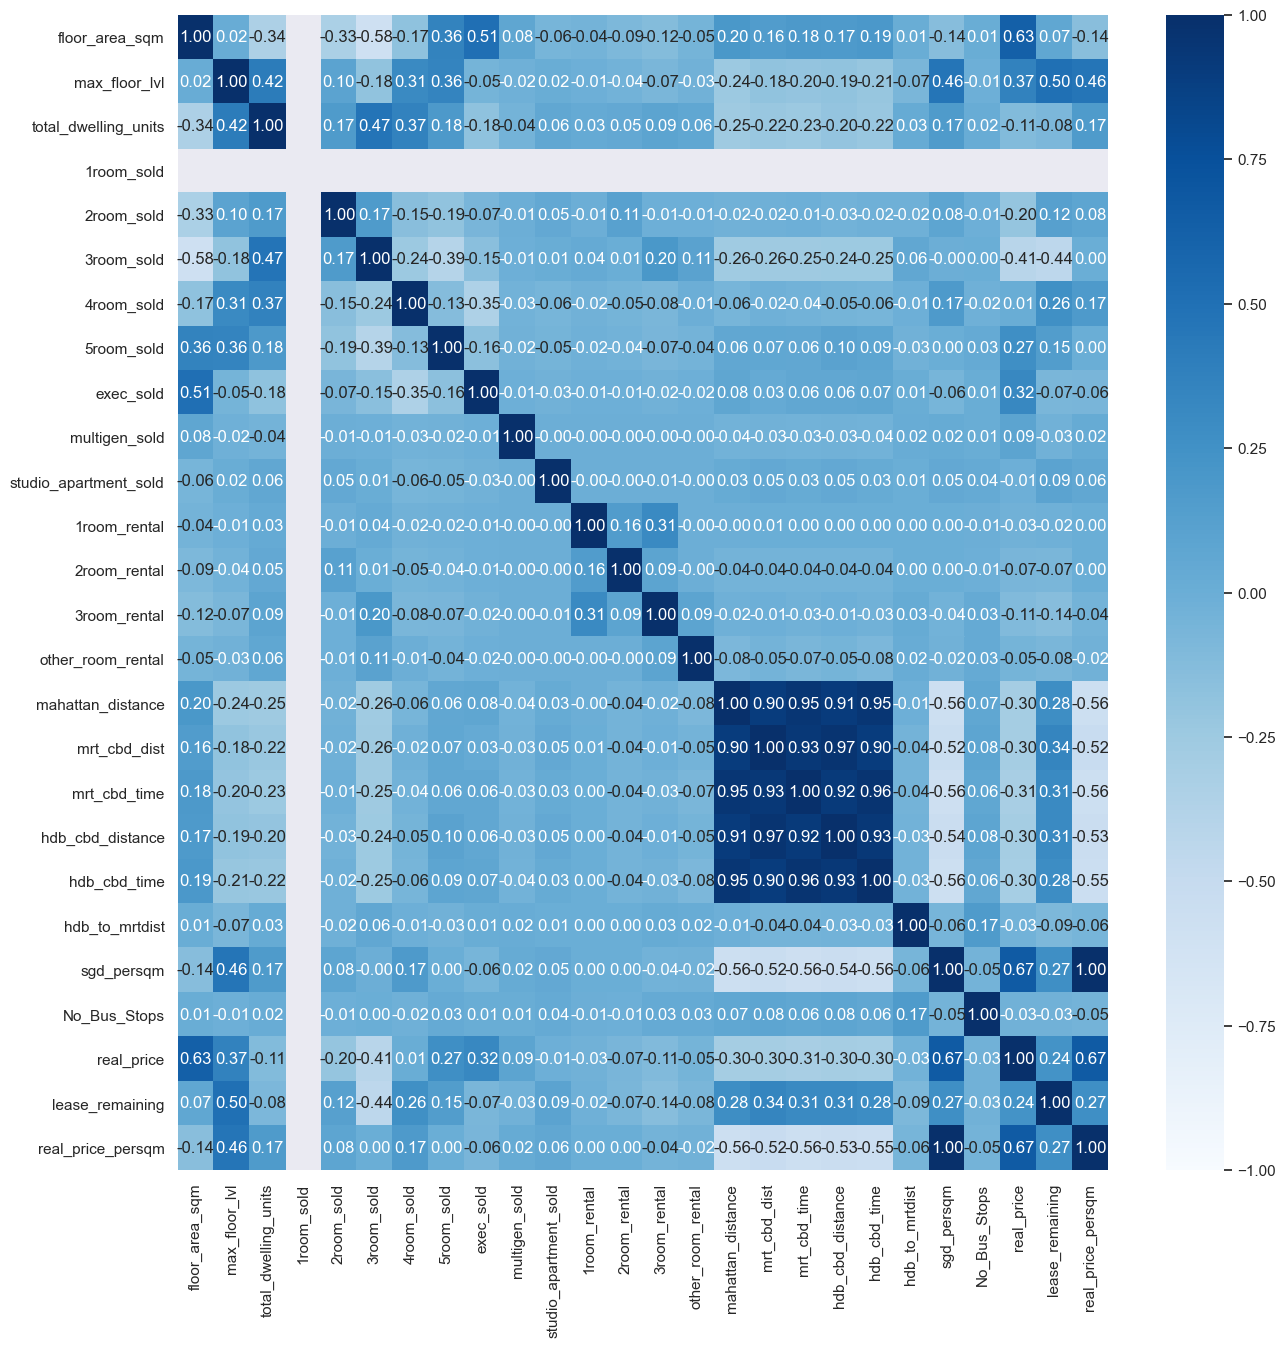

In [5]:
temp = residential[['floor_area_sqm', 'max_floor_lvl',
       'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold',
       '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'mahattan_distance',
       'mrt_cbd_dist', 'mrt_cbd_time', 'hdb_cbd_distance', 'hdb_cbd_time',
       'hdb_to_mrtdist', 'sgd_persqm', 'No_Bus_Stops', 'real_price', 'lease_remaining', 'real_price_persqm']]
f = plt.figure(figsize=(15,15))
sb.heatmap(temp.corr(),  vmin = -1, vmax = 1, annot = True, fmt=".2f", cmap ="Blues")

### High Variance inflation factors 

The VIFs measures the extent to which multicollinearity has increased the variance of an estimated coefficient. It looks at the extent to which an explanatory variable can be explained by all other explanatory variables in the equations. <br>
Reference:
https://www.sfu.ca/~dsignori/buec333/lecture%2016.pdf

If VIF>5, R squared is more than 0.8. So we shall remove the variables 

From the above heatmap, the following variables is easily explained by another:
1. manhattan distance
2. mrt_cbd_dist
3. mrt_cbd_time
4. hdb_cbd_dist
5. hdb_cbd_time
6. sgd_persqm

Among all of them, we shall keep the distance from hdb to the cbd (hdb_cbd_dist). 

#### Factors that affect real_price_persqm
Using the heatmap above, we can roughly gauge which x variables have a `linear` relationship with the y variable of `real_price_persqm`. Anything above 0 is considered. Later, t-test and p-values will be used to test if they are significant. 
1. floor_area_sqm
2. max_floor_lvl
3. total_dwelling_unit
4. 2room_sold
5. 4room_sold
6. exec_sold
7. multigen_sold
8. studio_apartment_sold
9. 3room_rental
10. other_room_rental
11. hdb_cbd_dist
12. hdb_to_mrtdist
13. No_Bus_Stops
14. Real price (surprisingly real price and real price per sqm is not highly correlated?)
15. lease_remaining

# Finding x variables that are affecting other x variables in a non linear manner

From the above heatmap, we could narrow down the x variables that affects y. We could also remove x variables affecting other x variables strongly in a linear manner. 

With the remaining x variables:
1. floor_area_sqm
2. max_floor_lvl
3. total_dwelling_unit
4. 2room_sold
5. 4room_sold
6. exec_sold
7. multigen_sold
8. studio_apartment_sold
9. 3room_rental
10. other_room_rental
11. hdb_cbd_dist
12. hdb_to_mrtdist
13. No_Bus_Stops
14. Real price (surprisingly real price and real price per sqm is not highly correlated?)
15. lease_remaining

We need to ensure each x variable is not affected by multiple other x variables in a linear or non linear manner


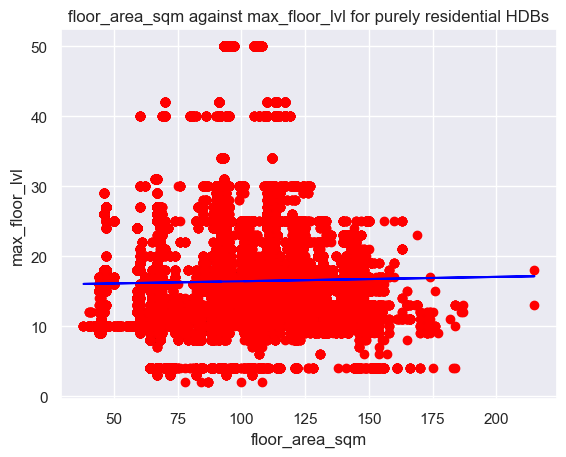

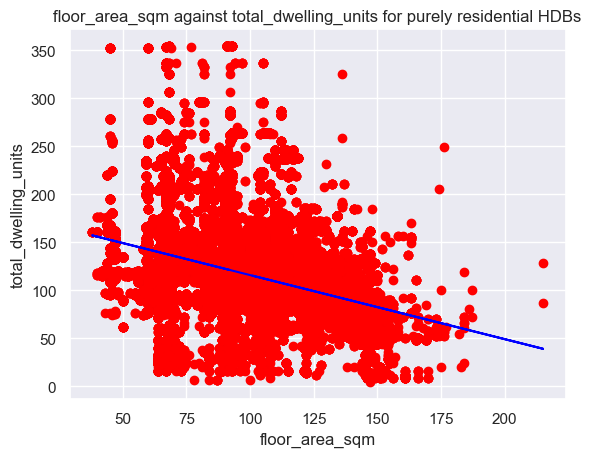

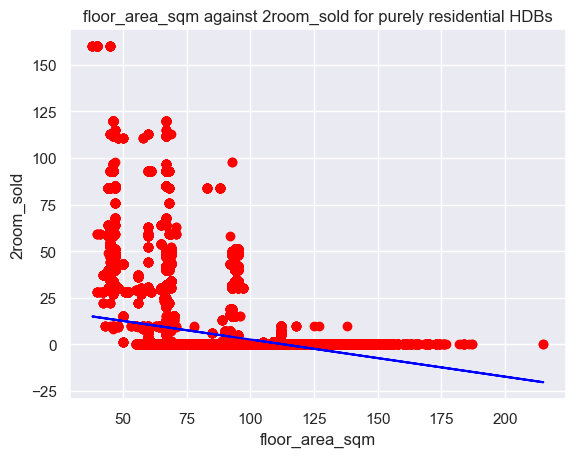

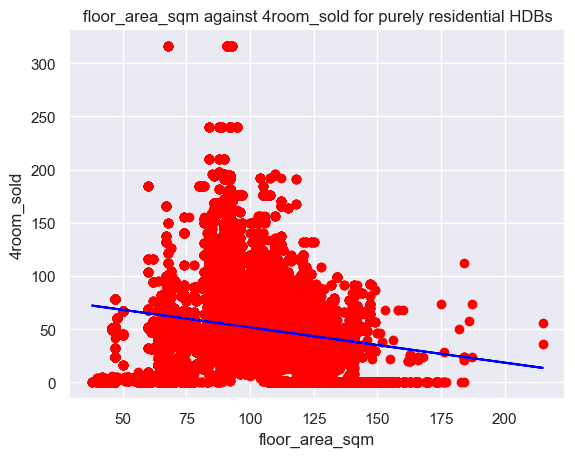

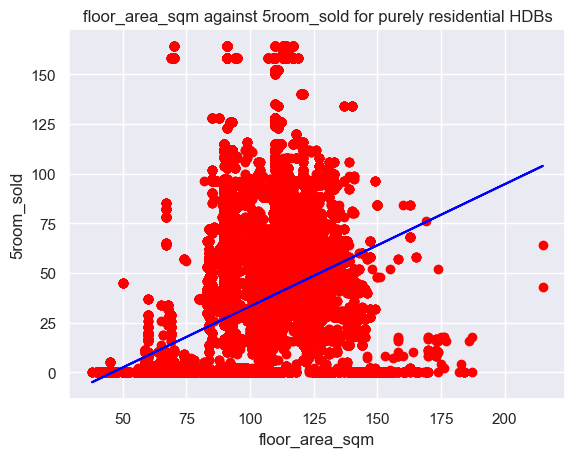

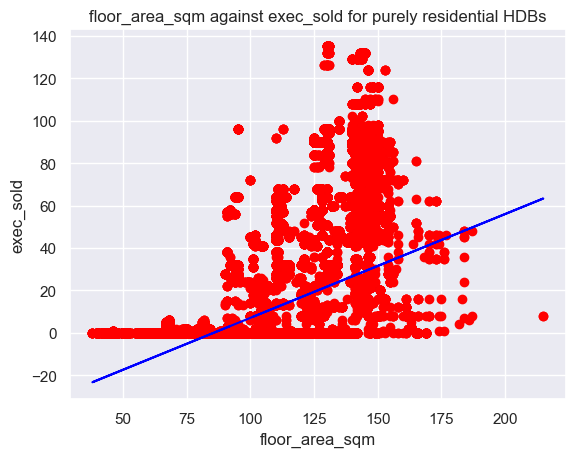

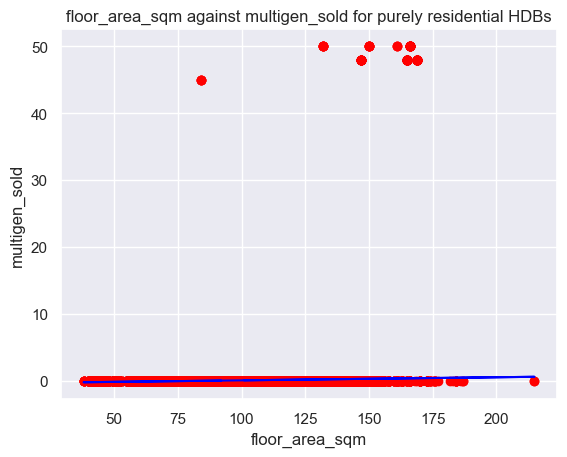

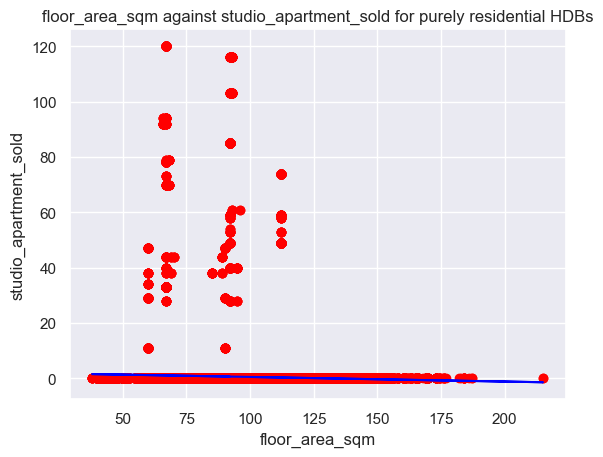

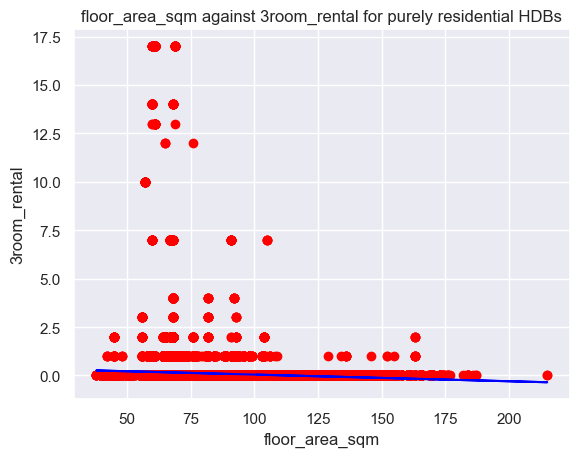

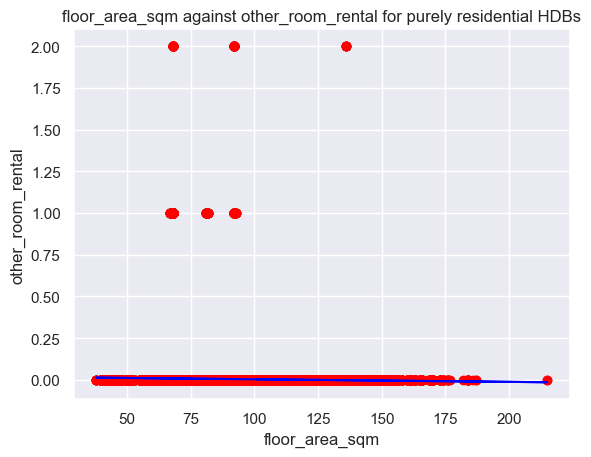

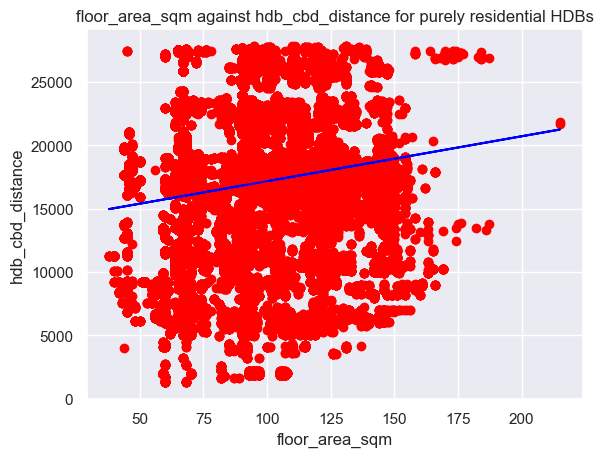

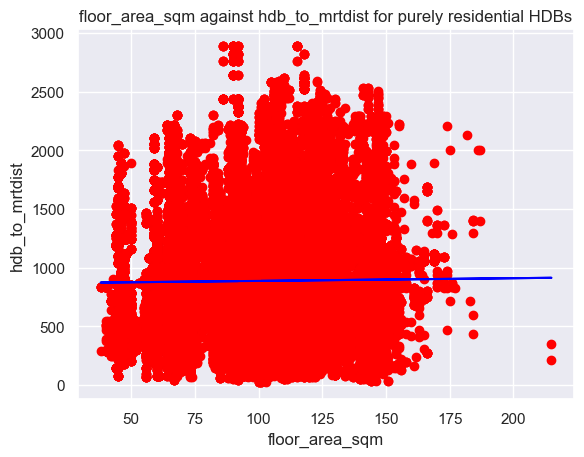

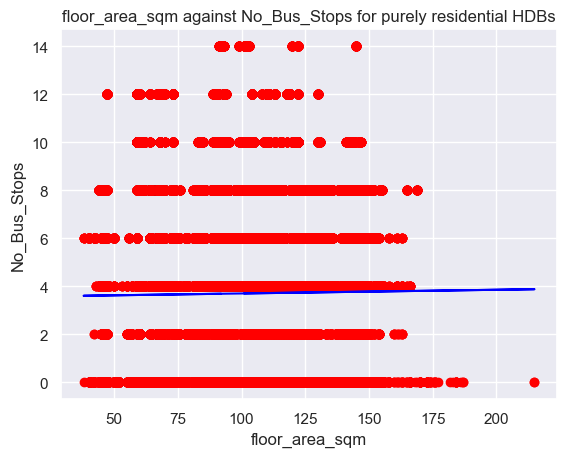

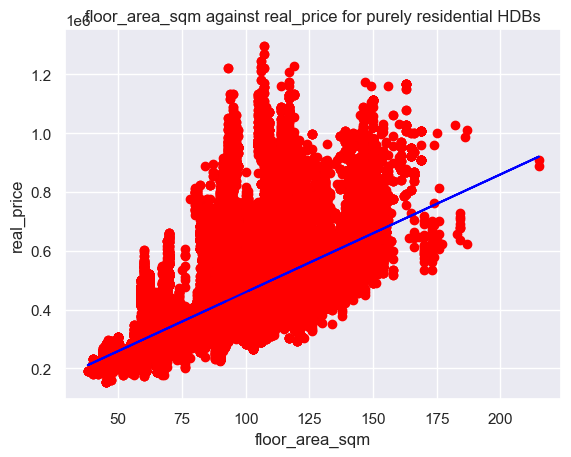

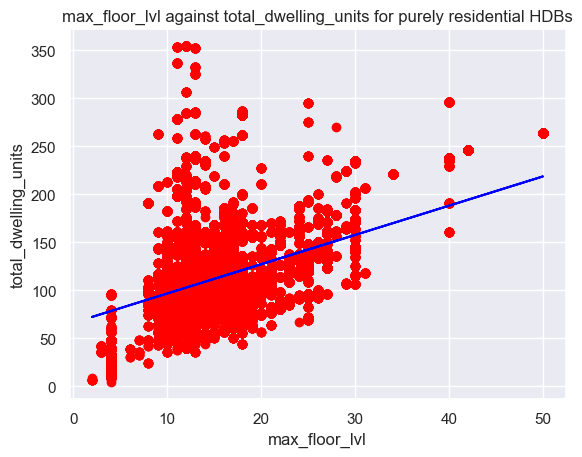

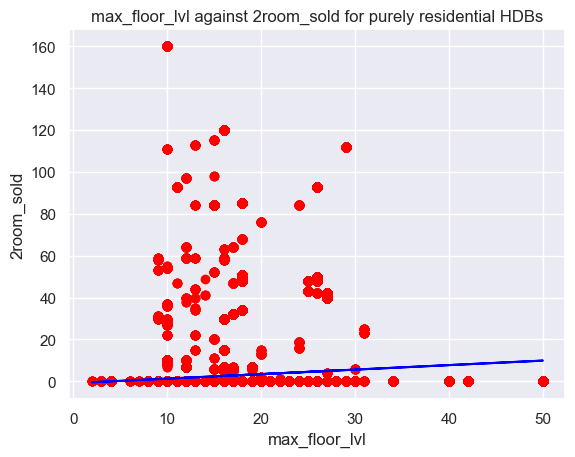

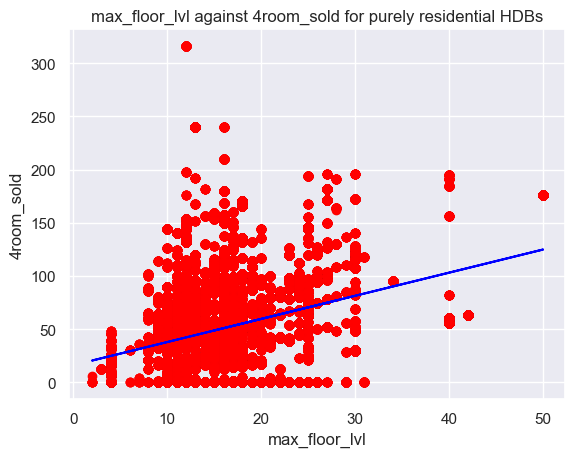

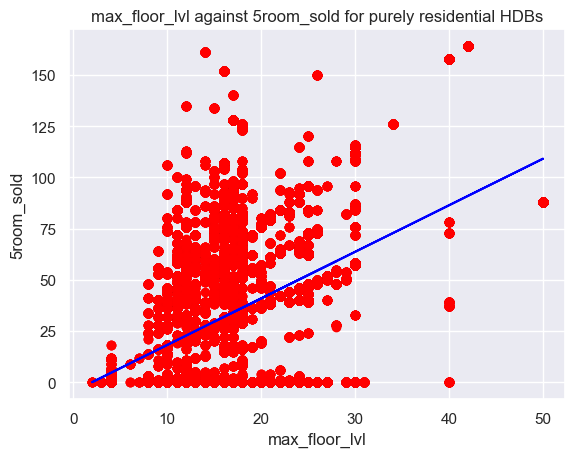

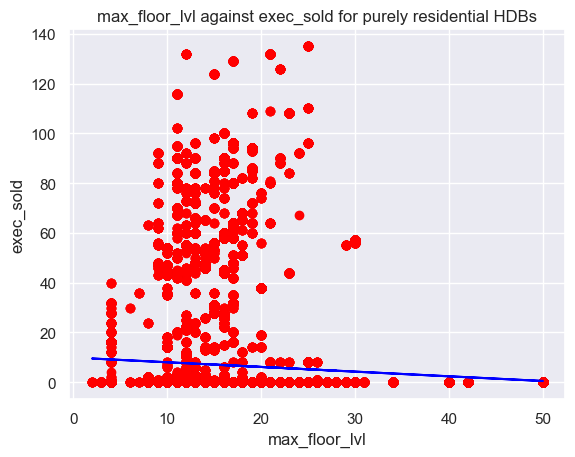

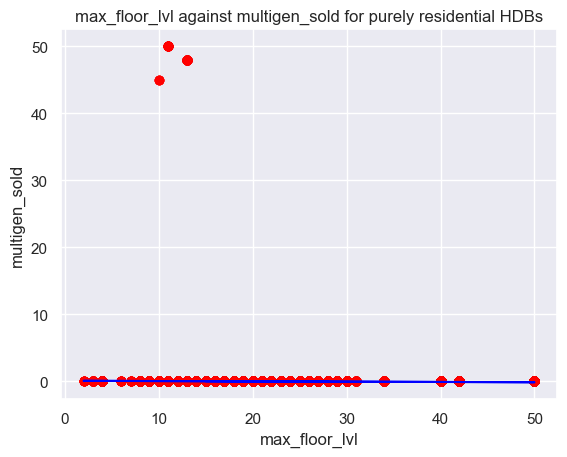

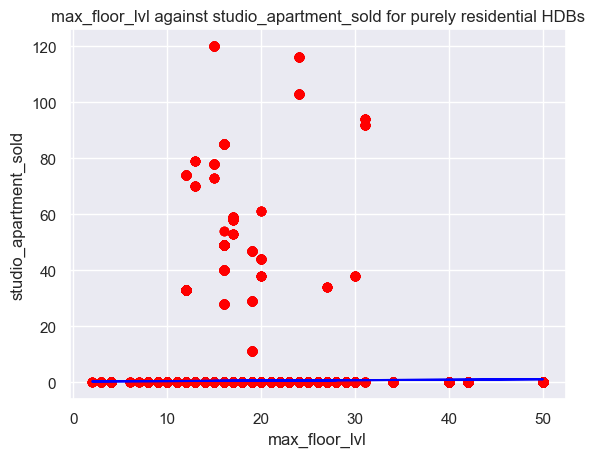

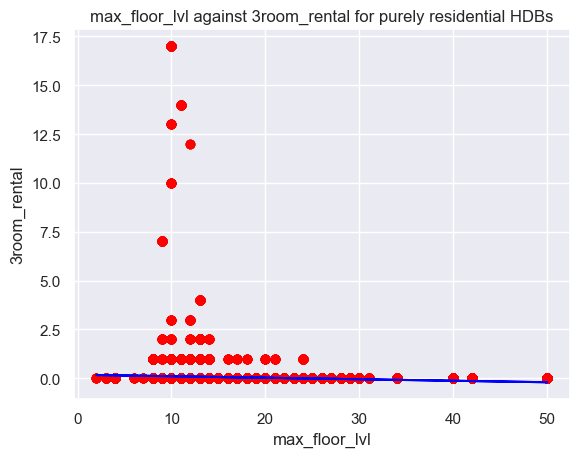

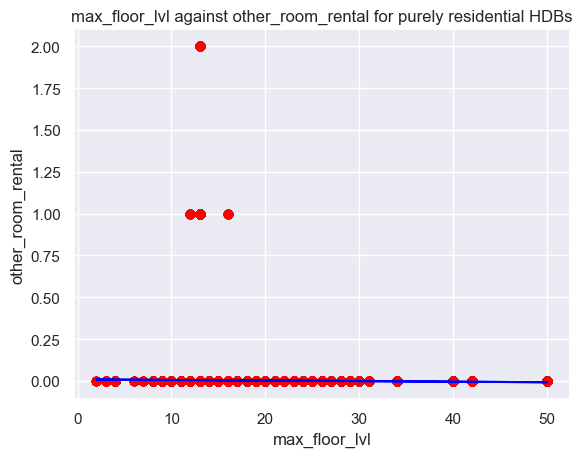

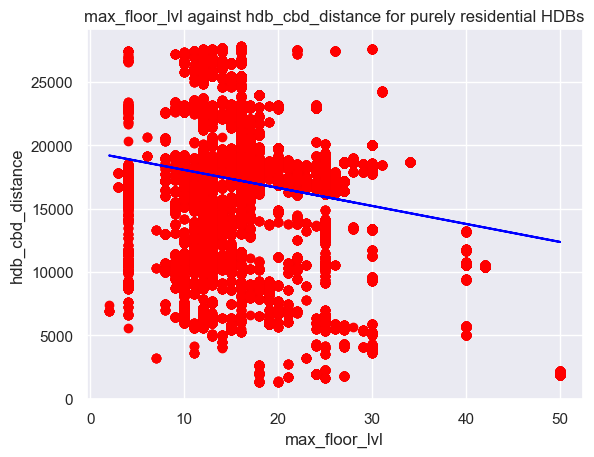

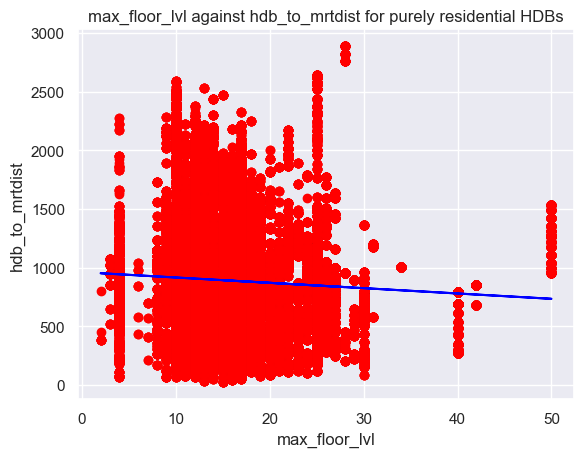

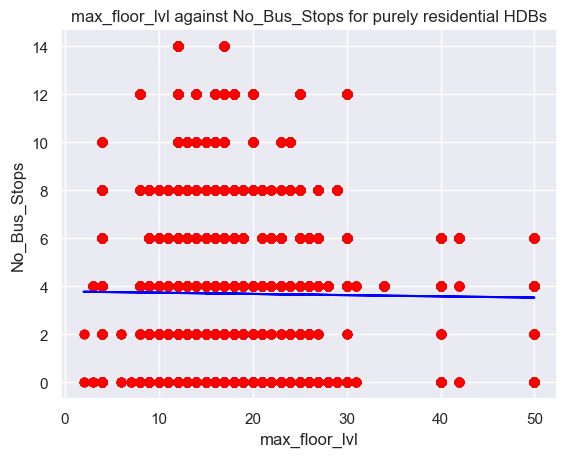

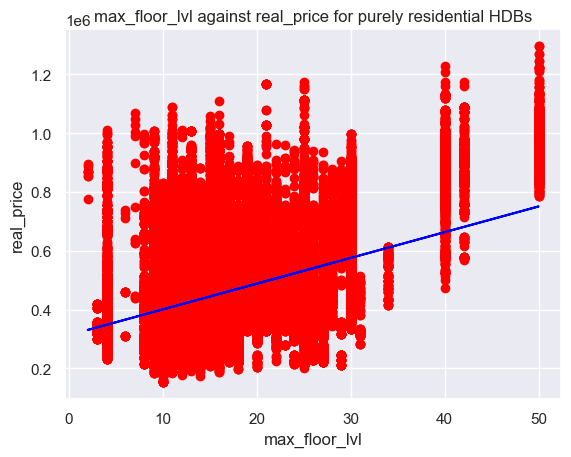

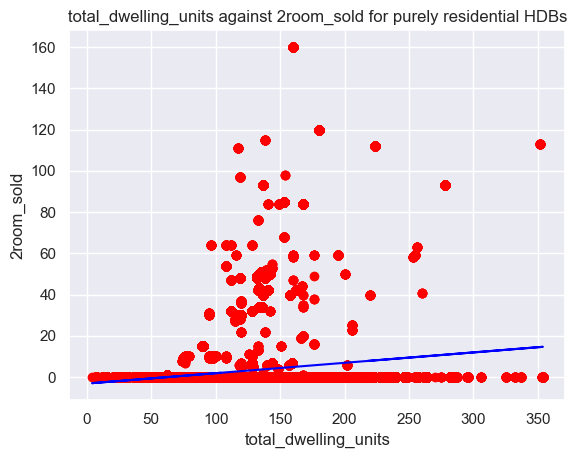

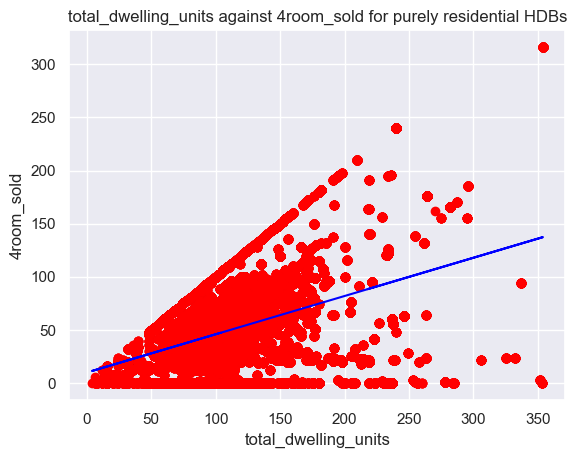

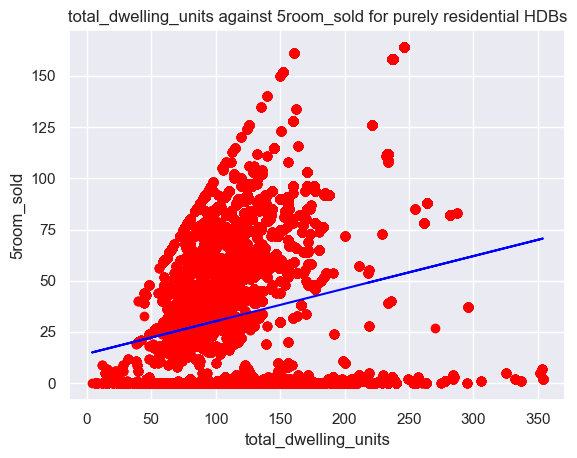

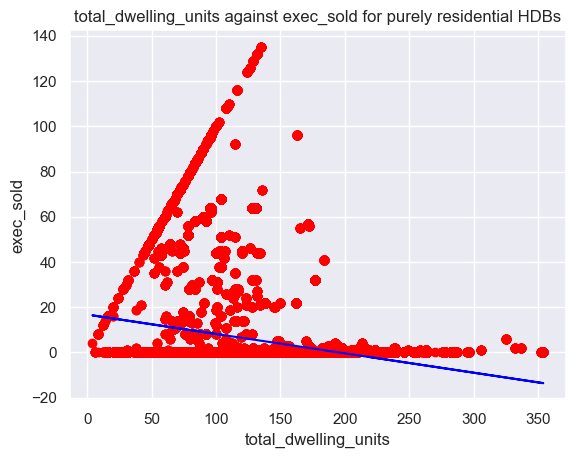

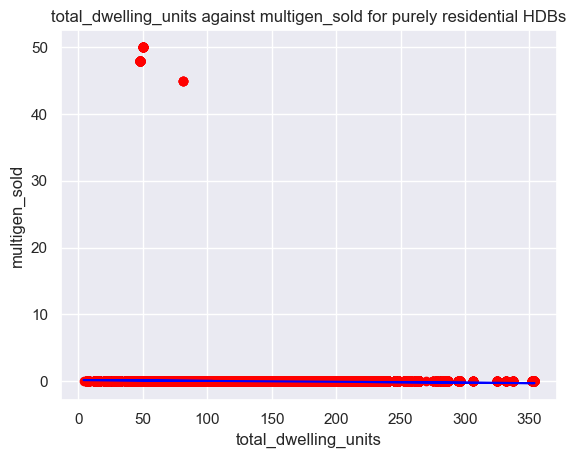

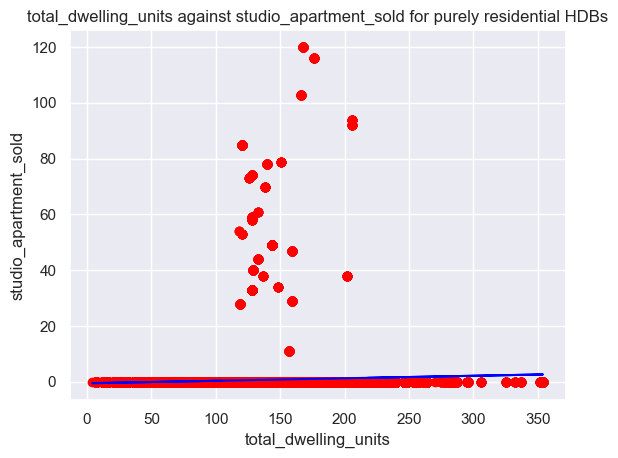

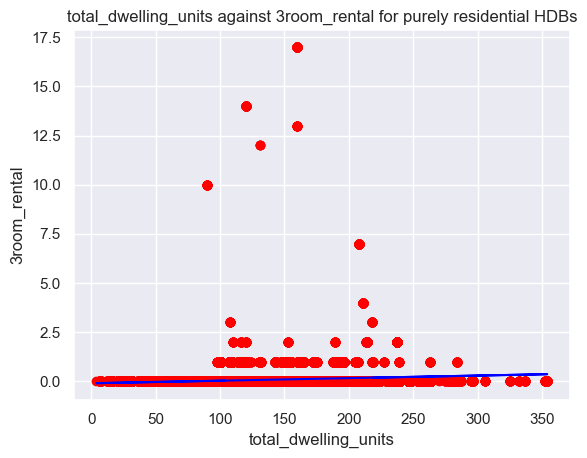

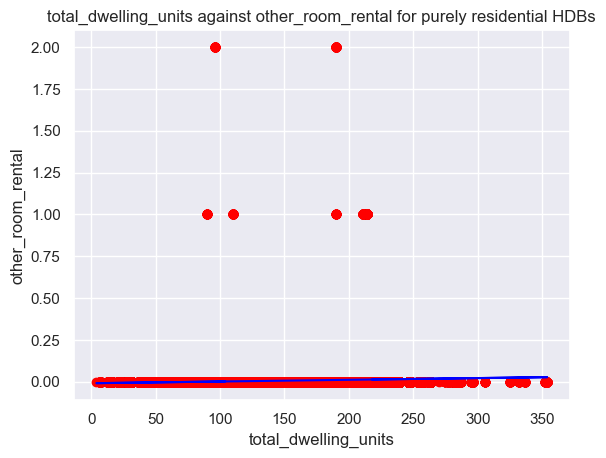

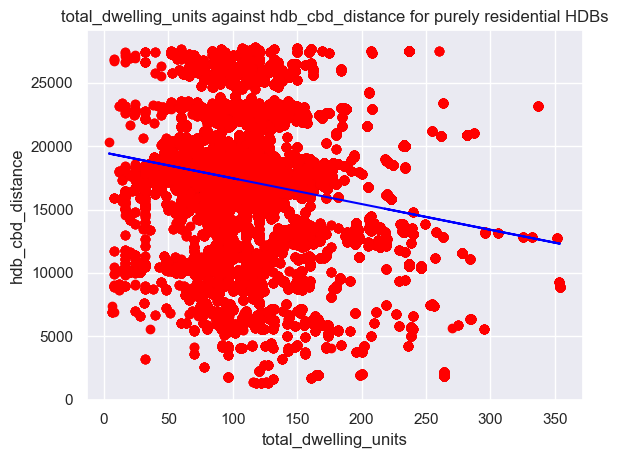

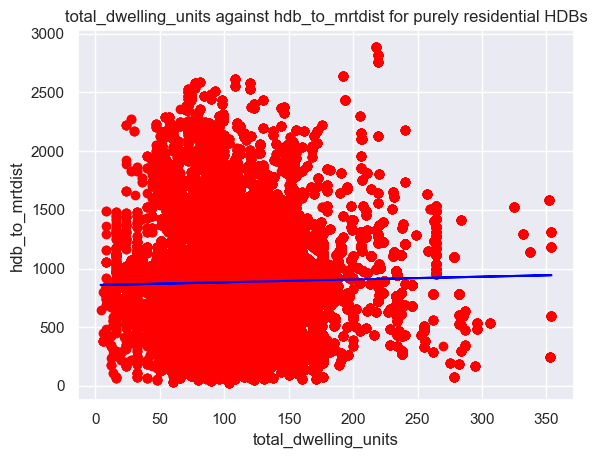

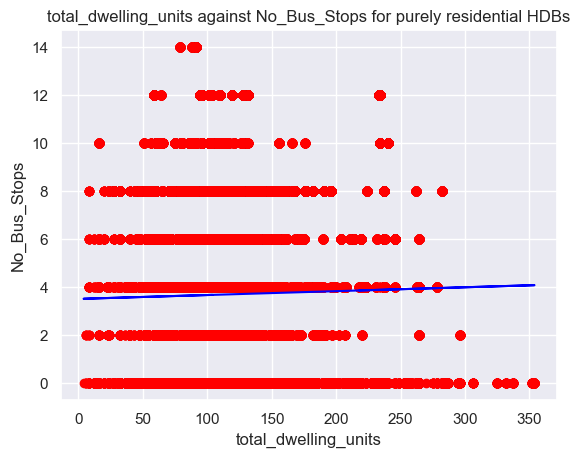

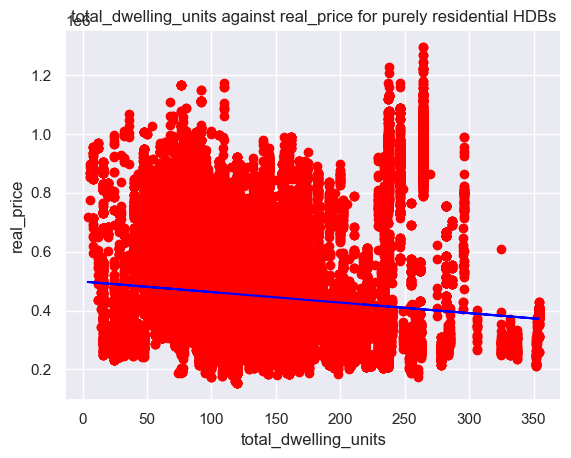

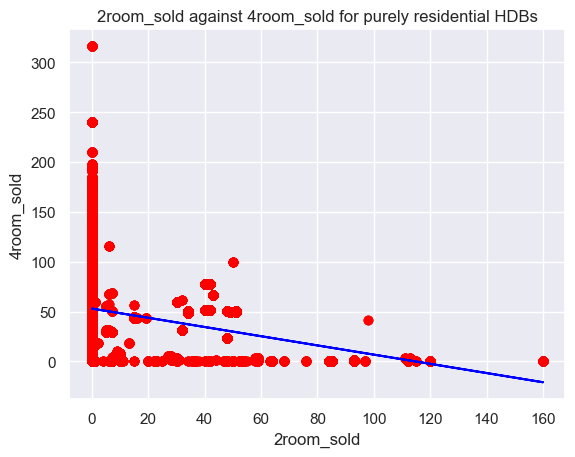

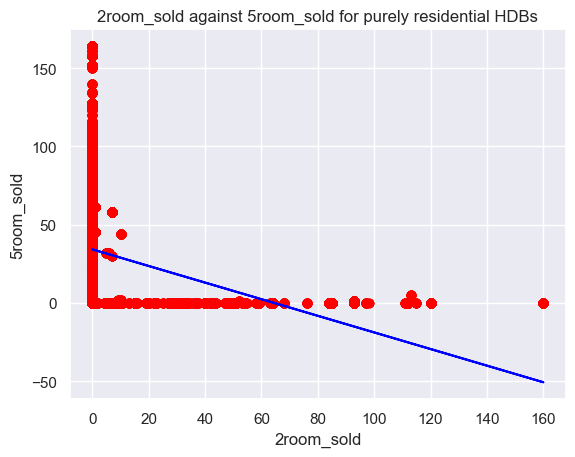

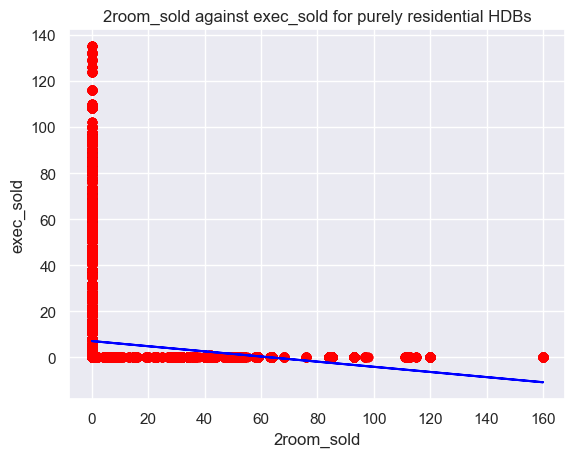

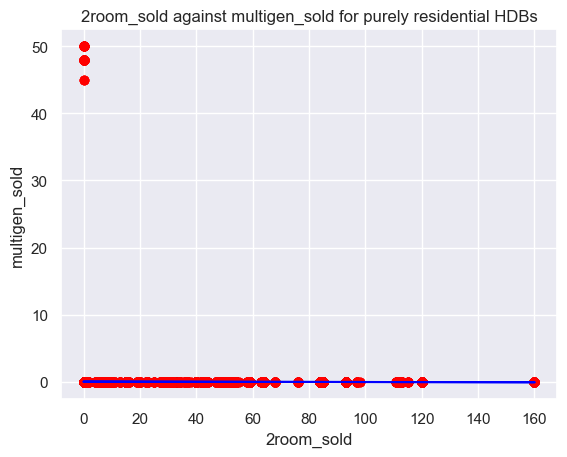

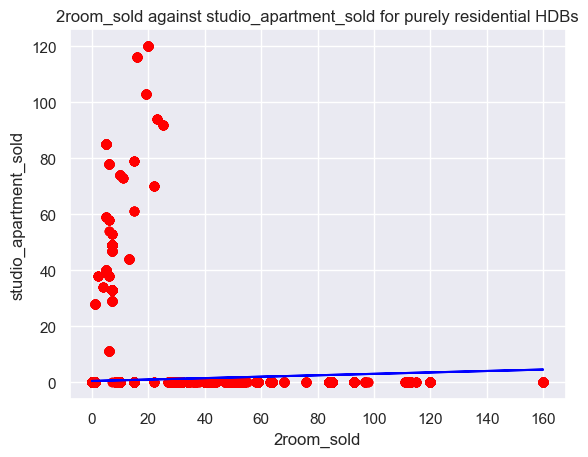

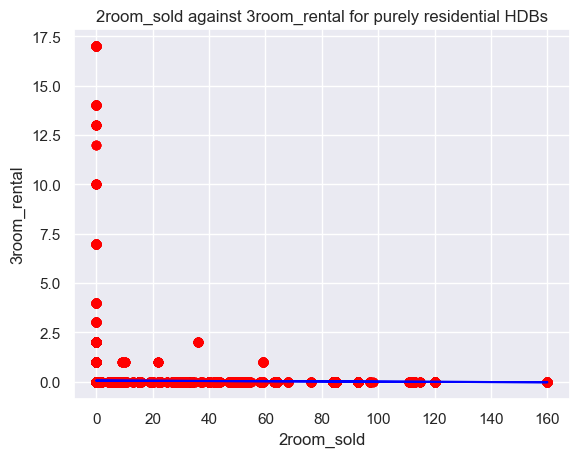

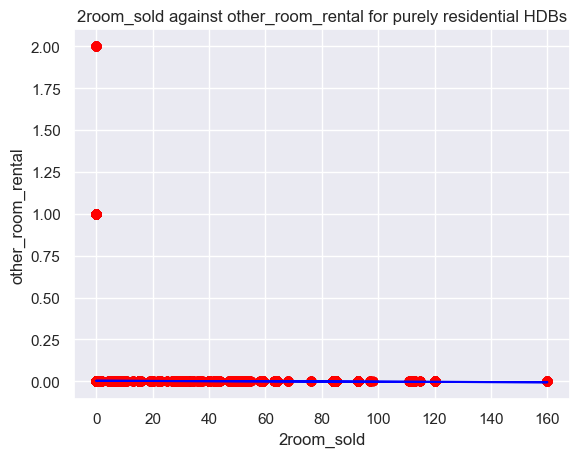

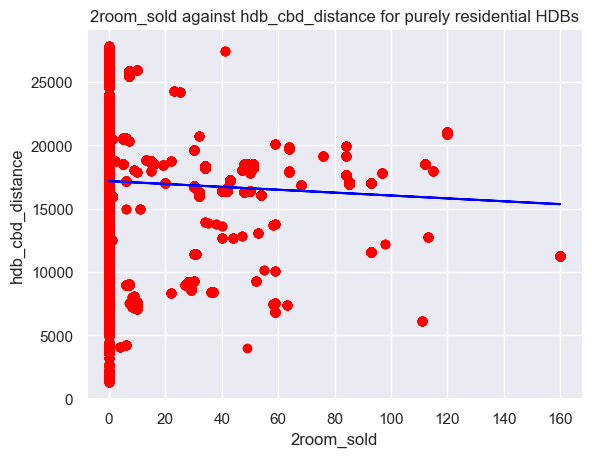

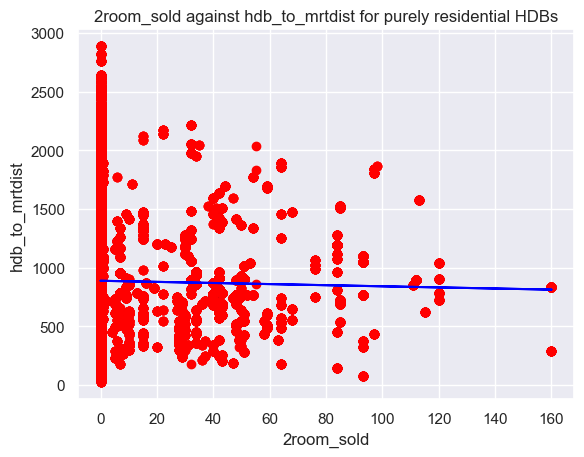

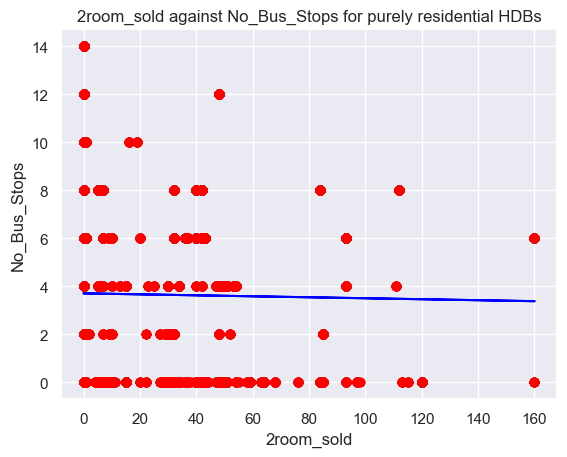

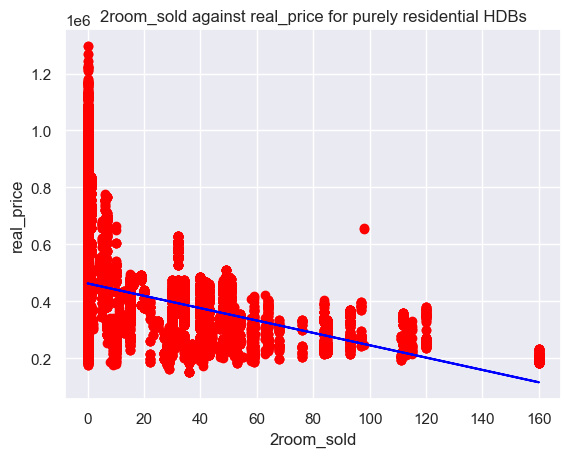

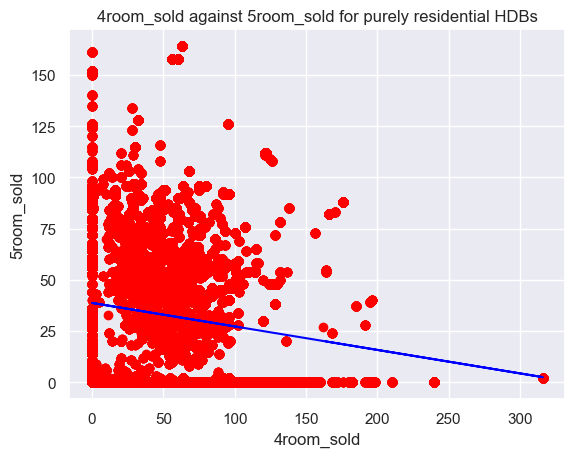

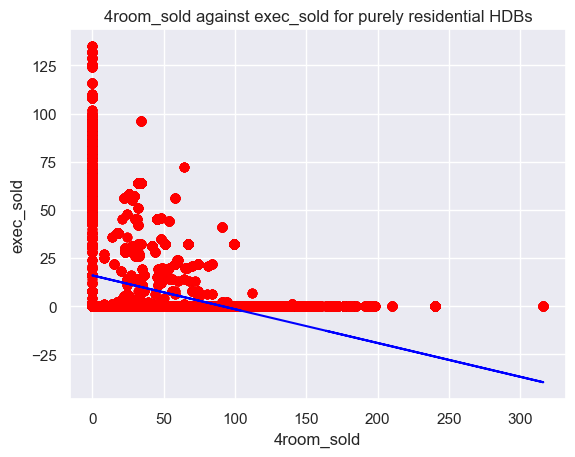

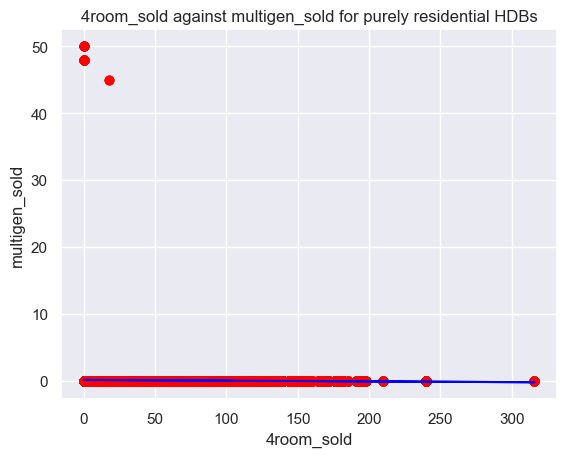

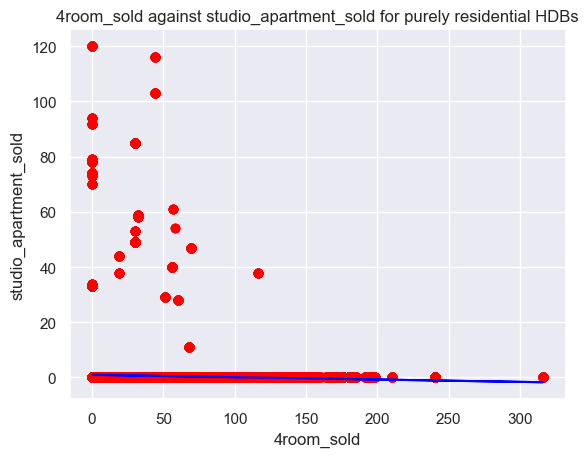

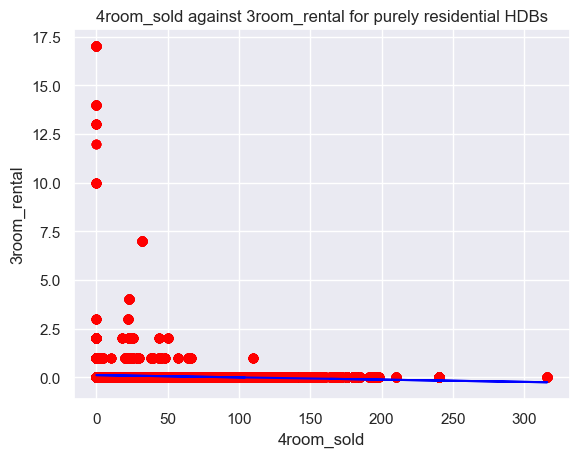

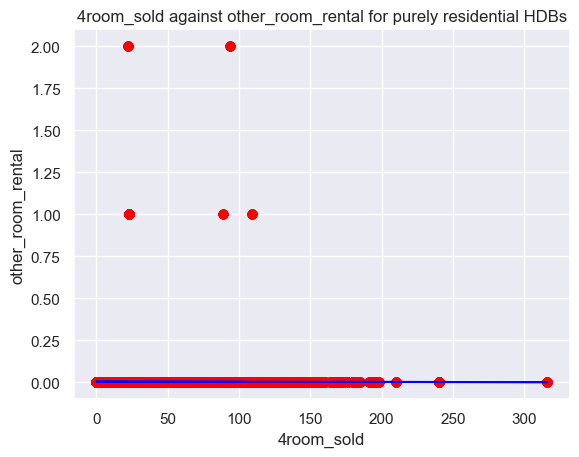

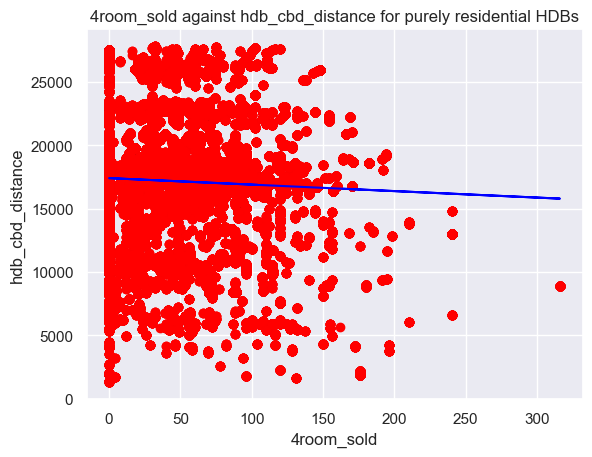

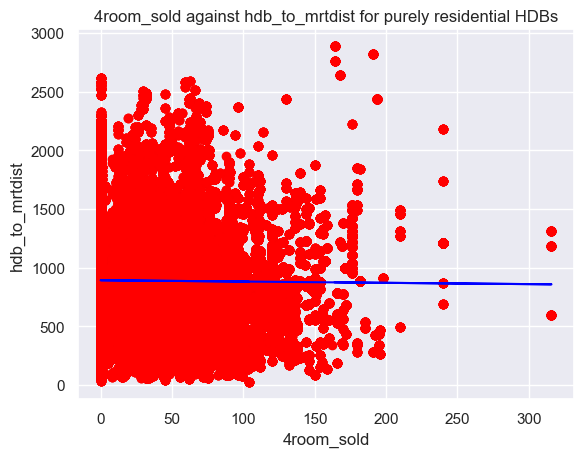

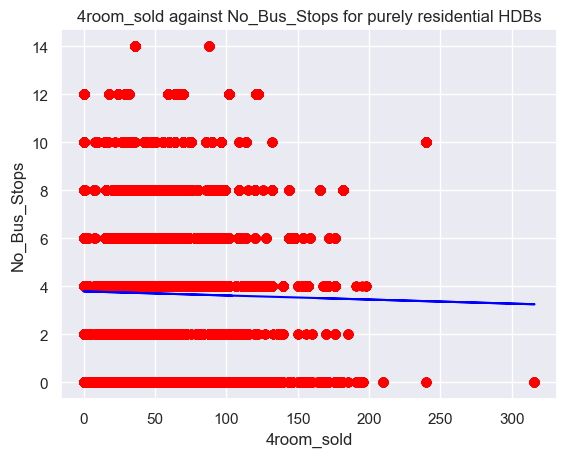

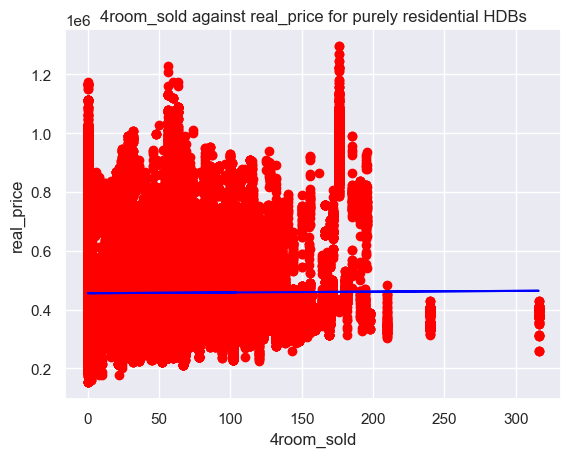

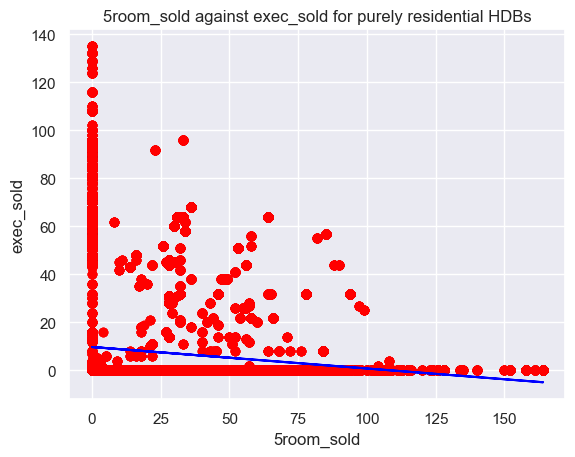

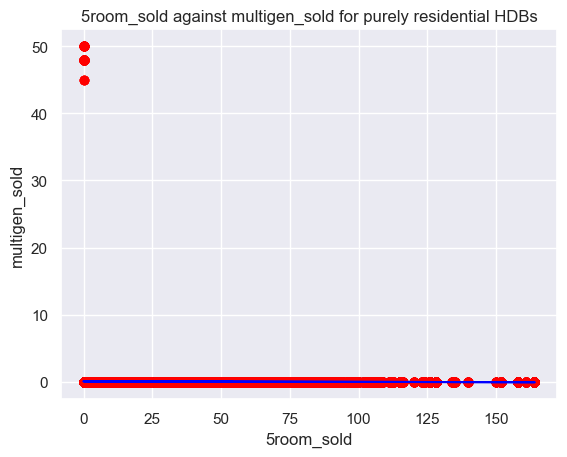

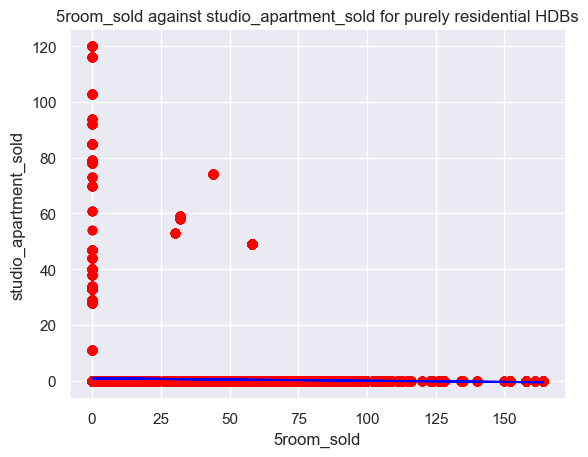

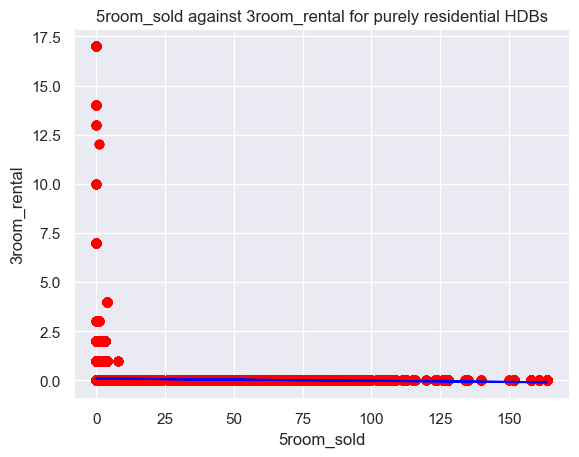

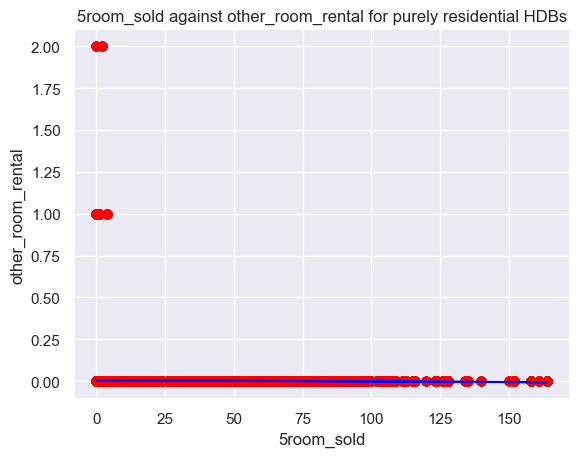

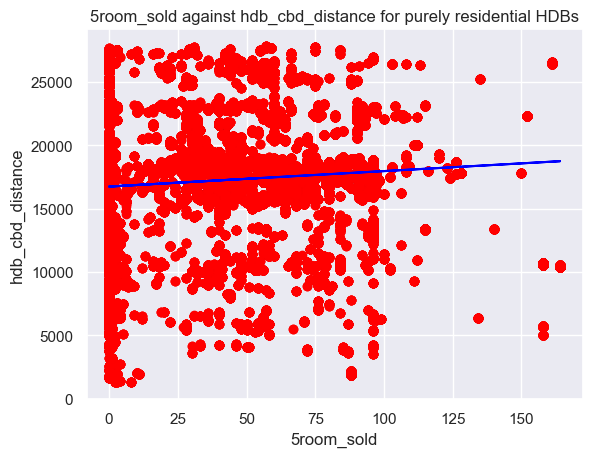

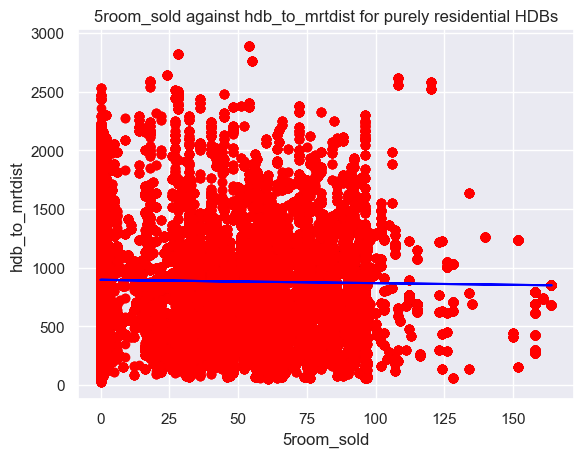

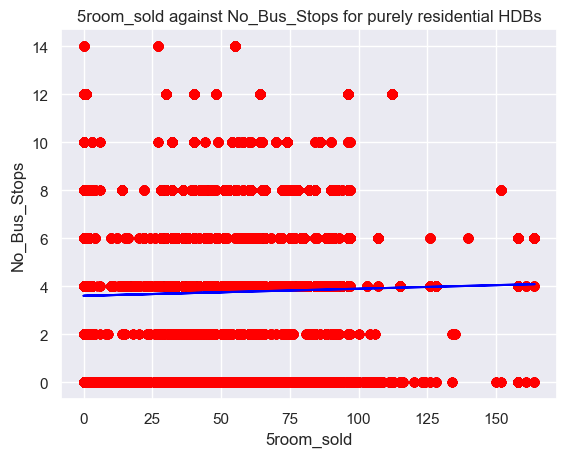

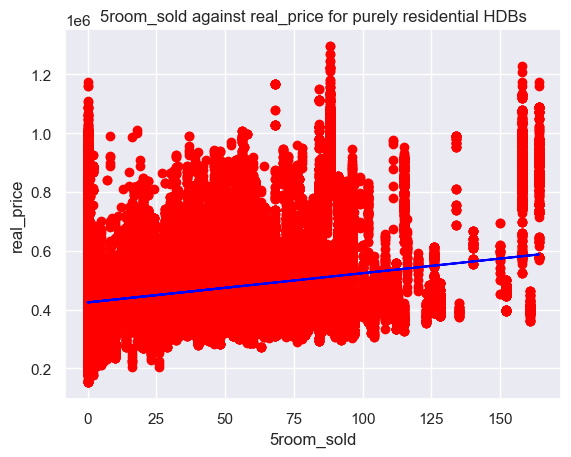

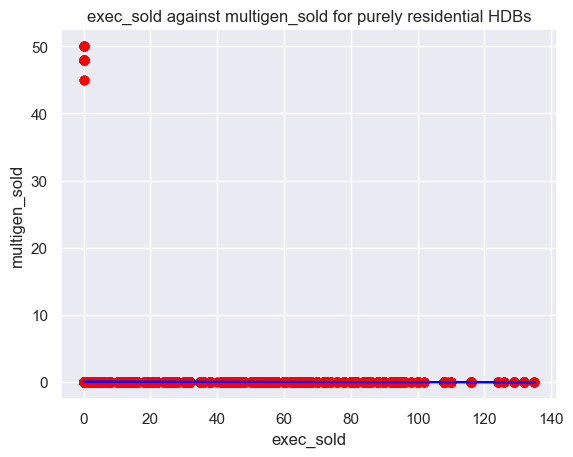

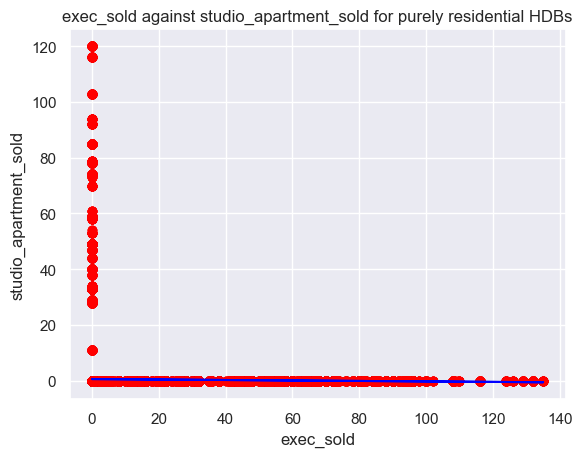

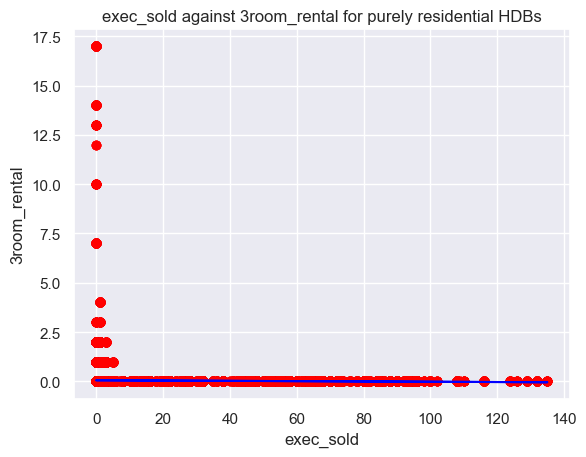

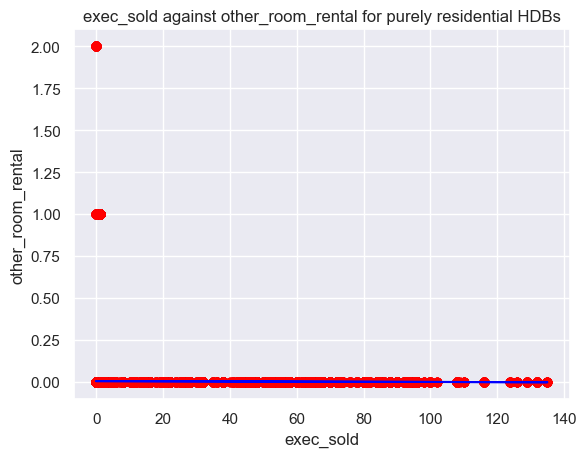

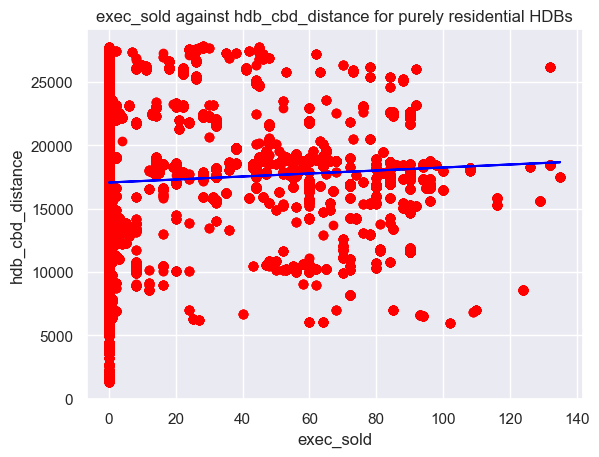

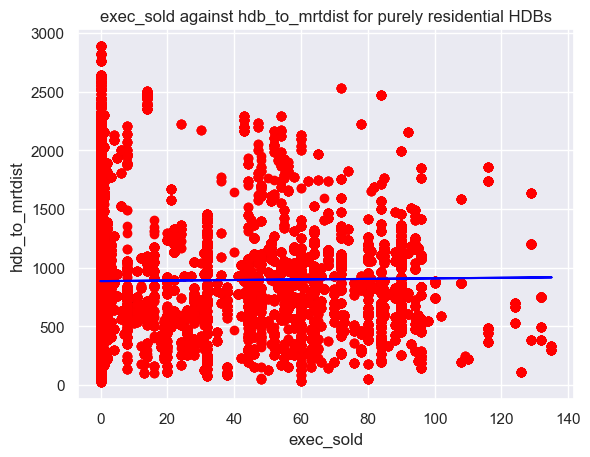

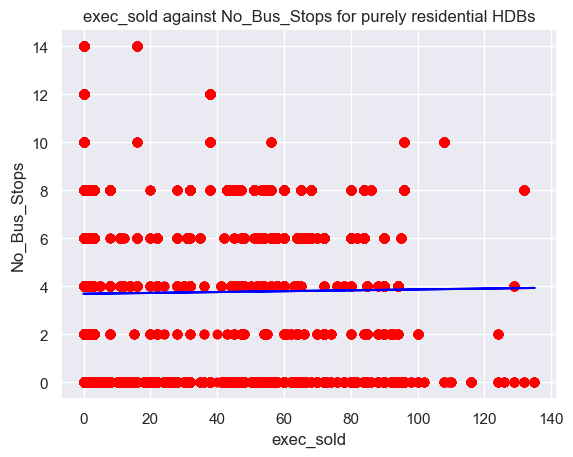

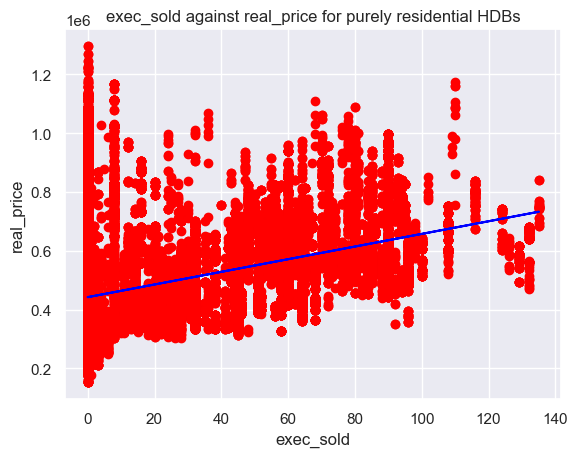

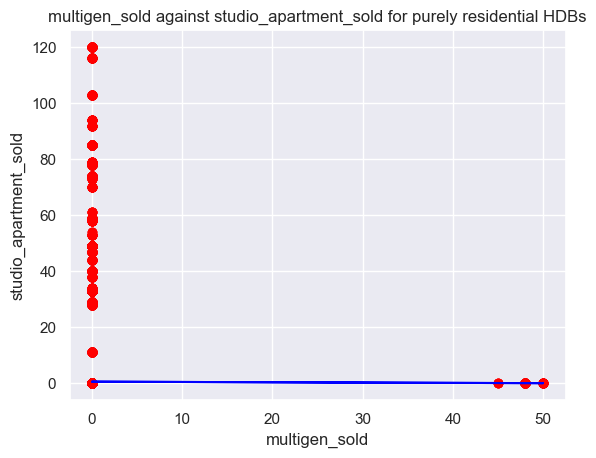

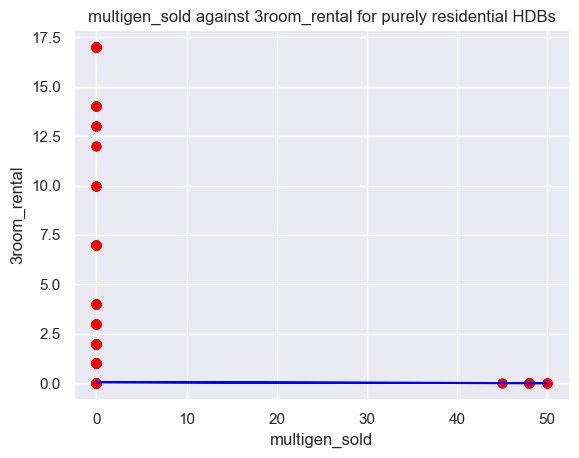

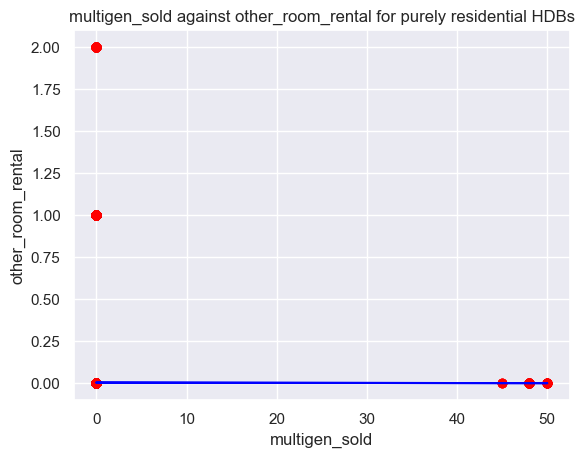

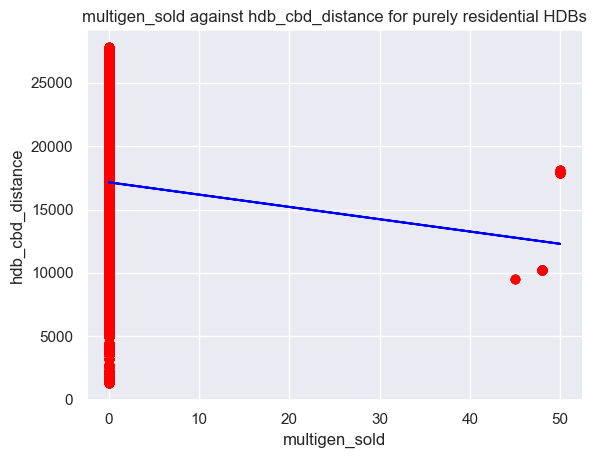

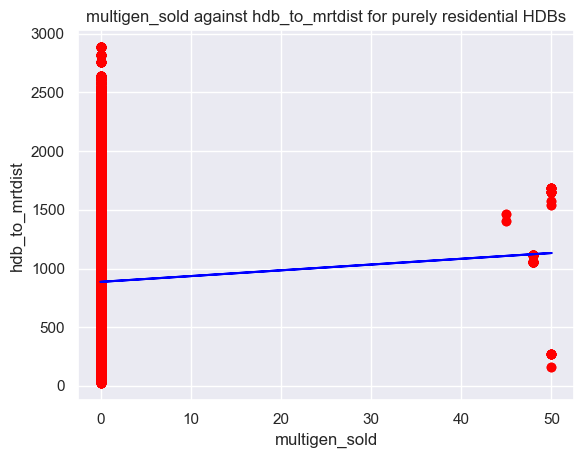

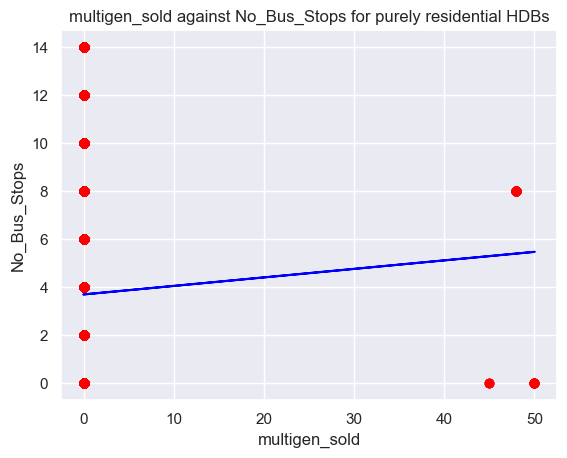

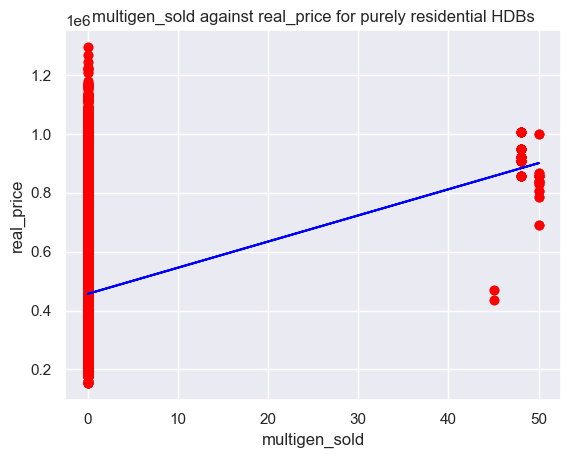

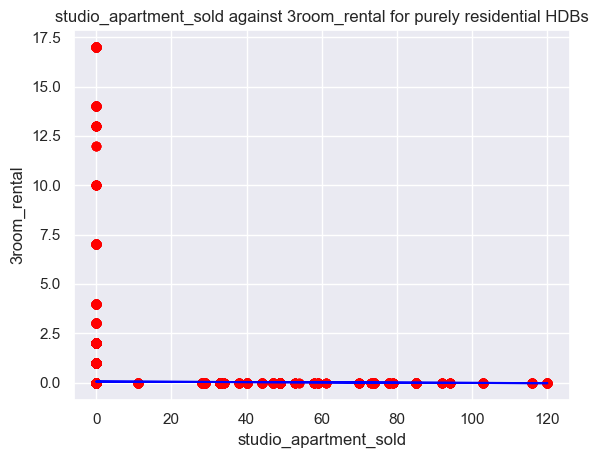

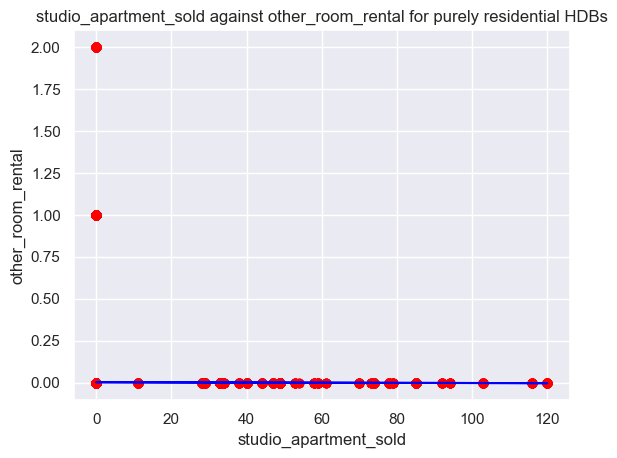

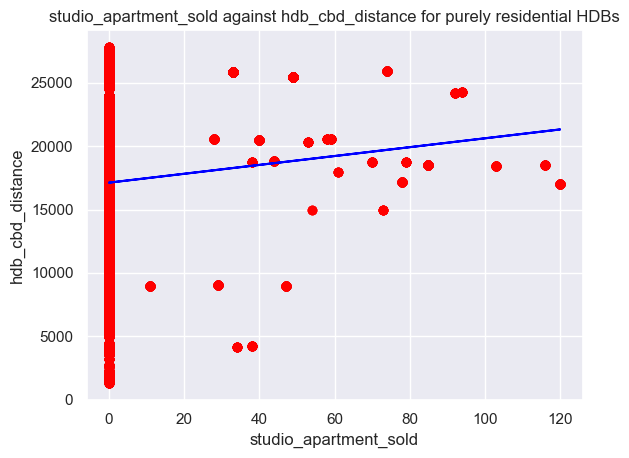

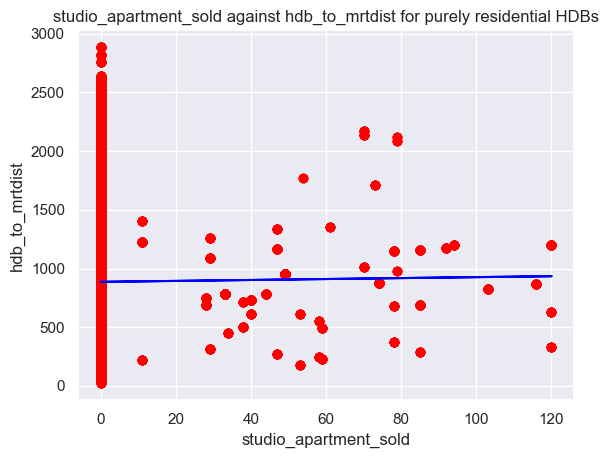

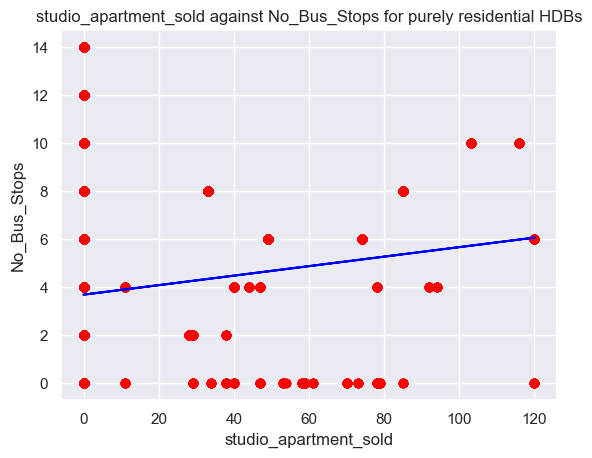

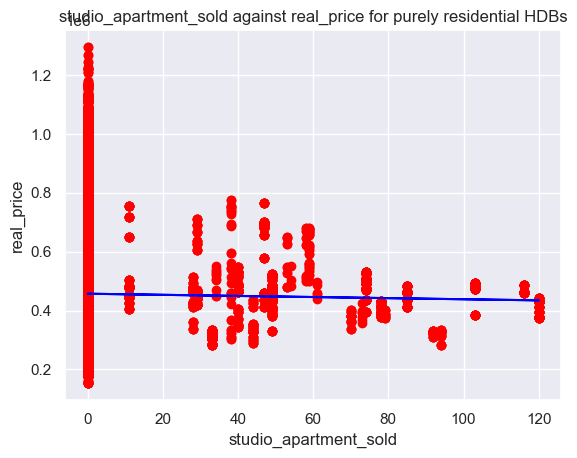

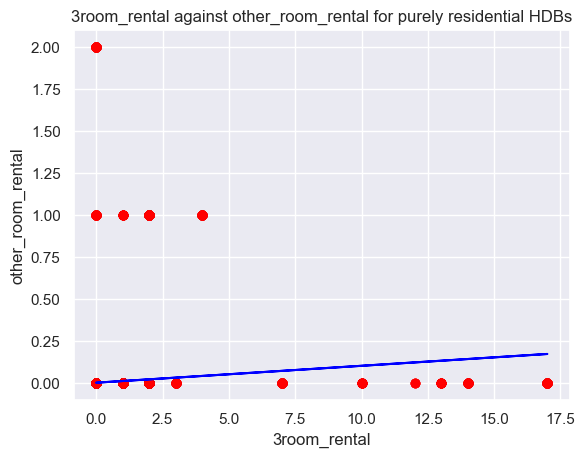

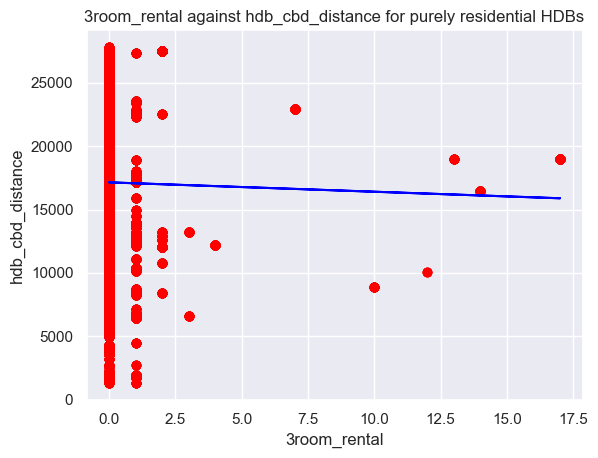

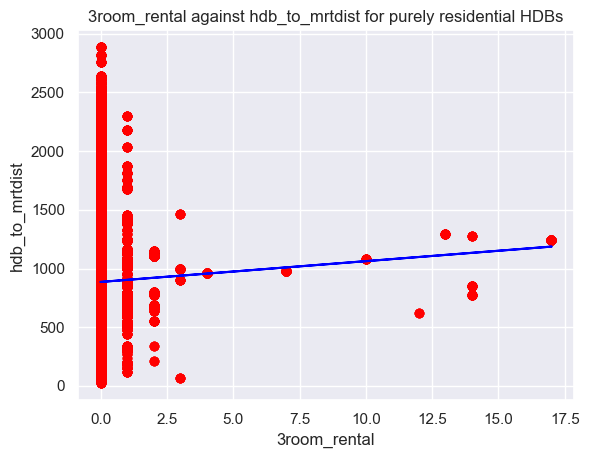

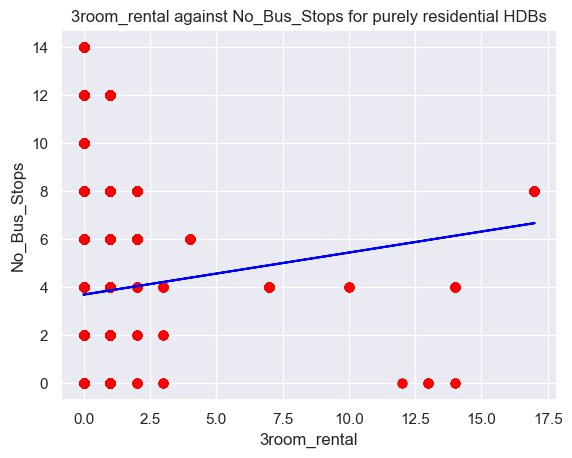

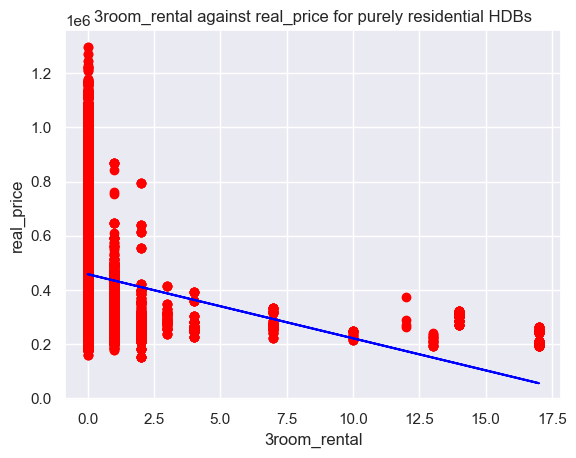

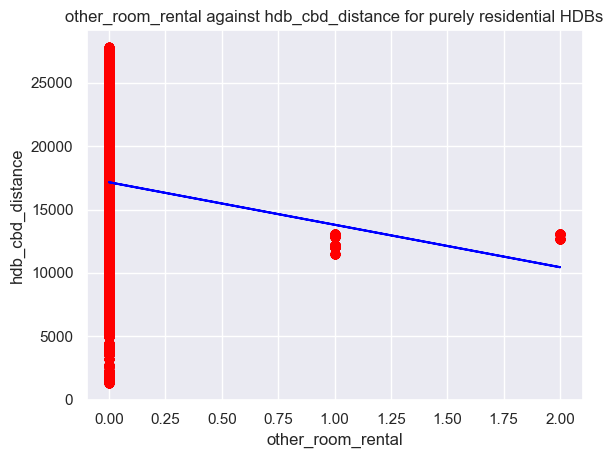

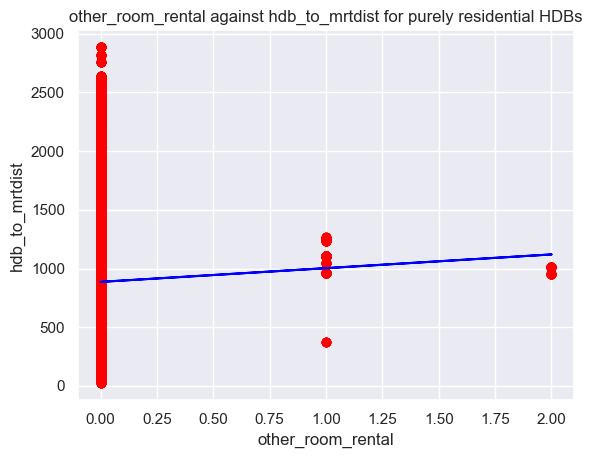

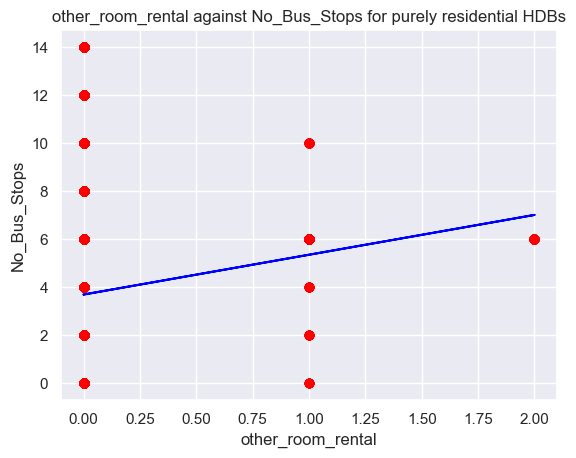

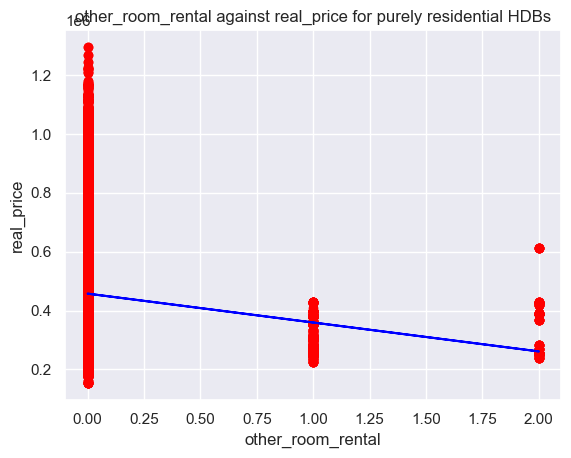

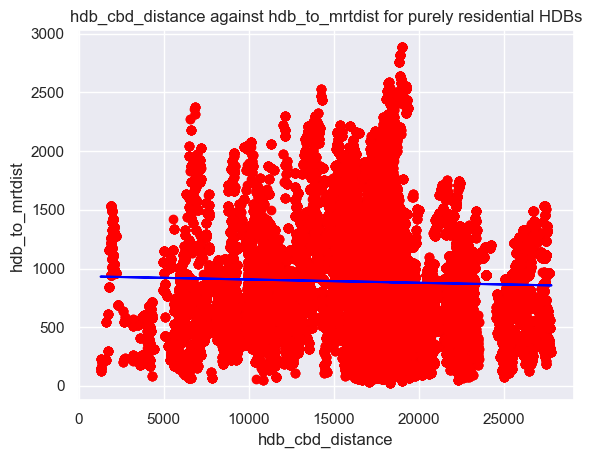

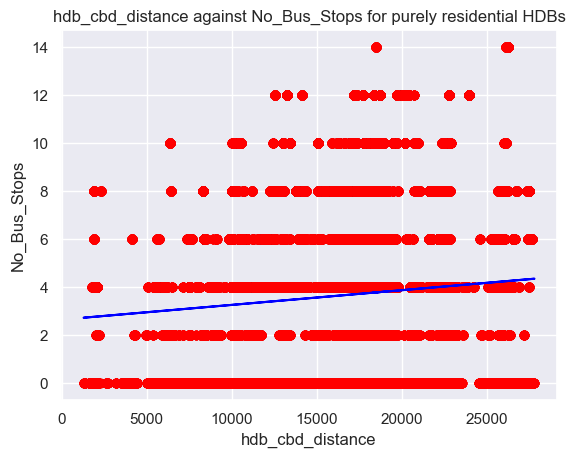

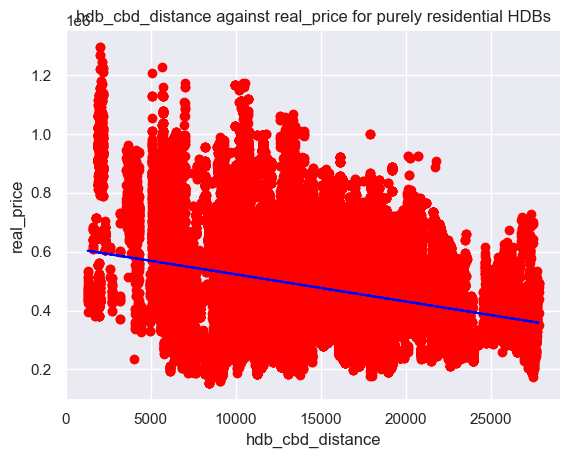

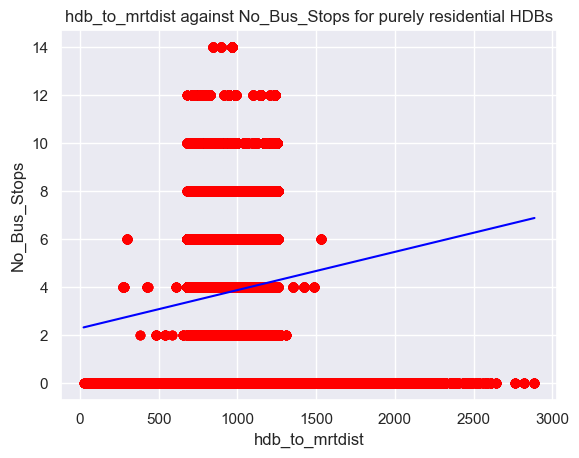

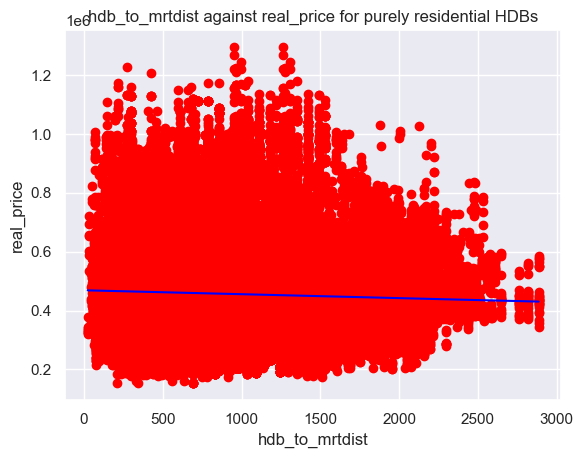

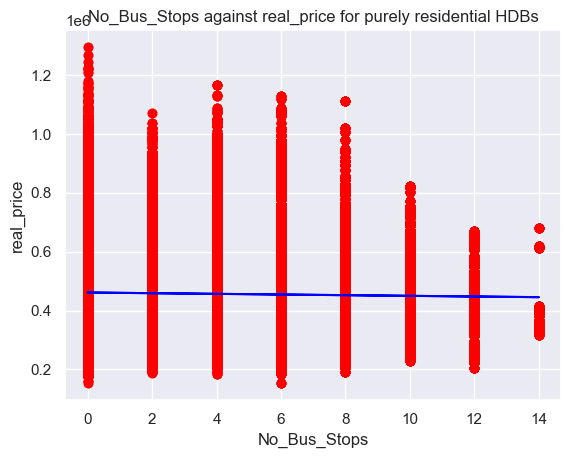

In [6]:
from sklearn.linear_model import LinearRegression

def printgraph(x:str,y:str):
    X=residential[[x]]
    Y=residential[[y]]
    
    titlestr = x + ' against ' + y + ' for purely residential HDBs'

    regressor = LinearRegression()
    regressor.fit(X,Y)
    y_pred = regressor.predict(X)
    plt.scatter(X, Y, color = 'red', )
    plt.plot(X, regressor.predict(X), color = 'blue')
    plt.title(titlestr)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

llist = ['floor_area_sqm','max_floor_lvl',
       'total_dwelling_units', '2room_sold',
       '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '3room_rental',
       'other_room_rental', 'hdb_cbd_distance',
       'hdb_to_mrtdist', 'No_Bus_Stops', 'real_price', 'lease_remaining']

for i in range(0, len(llist)-1):
    for j in range(i+1, len(llist)-1):
        printgraph(llist[i], llist[j])


# for i in range(0, len(llist)-1):
#     printgraph('4room_sold', llist[i])
        

## Explanation of the above graphs

1. real price is affected by floor_area_sqm at R squared value of 0.63. But logically it does affect. 
2. total dwelling units is affected by max floor at R squared value of 0.42
3. real price is affected by max floor at R squared value of 0.37
4. 4 room and 5 room are only sold on buildings with higher max floor levels. 
5. real price is affect by hdb cbd distance with R square value of -0.3


Put it together:
1. Real price could be affect by floor area sqm, max floor, hdb cbd distance
2. max floor could be affected or correlated with the 4 room and 5 room houses and total dwelling units 

In [7]:
X = residential[['floor_area_sqm', 'max_floor_lvl',
        'hdb_cbd_distance']]
y = residential[['real_price']]
X_constant = sm.add_constant(X)
lr = sm.OLS(y, X_constant.astype(float)).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:             real_price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                 9.678e+04
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:06:33   Log-Likelihood:            -2.0212e+06
No. Observations:              158904   AIC:                         4.042e+06
Df Residuals:                  158900   BIC:                         4.042e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.058e+05   1351.696  

In [8]:
X = residential[['4room_sold', '5room_sold']]
y = residential[['total_dwelling_units']]
X_constant = sm.add_constant(X)
lr = sm.OLS(y, X_constant.astype(float)).fit()
print(lr.summary())

                             OLS Regression Results                             
Dep. Variable:     total_dwelling_units   R-squared:                       0.192
Model:                              OLS   Adj. R-squared:                  0.192
Method:                   Least Squares   F-statistic:                 1.894e+04
Date:                  Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                          18:06:33   Log-Likelihood:            -8.0245e+05
No. Observations:                158904   AIC:                         1.605e+06
Df Residuals:                    158901   BIC:                         1.605e+06
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6576      0.184

Confirming the above, we can see that real price is affected by floor area sqm, max floor, hdb cbd distance. So let us remove real price. Other than that, there is nothing to worry about total dwelling units, 4 room, 5 room and max floor as the R-squared is low. 

With the remaining x variables:
1. floor_area_sqm
2. max_floor_lvl
3. total_dwelling_unit
4. 2room_sold
5. 4room_sold
6. exec_sold
7. multigen_sold
8. studio_apartment_sold
9. 3room_rental
10. other_room_rental
11. hdb_cbd_dist
12. hdb_to_mrtdist
13. No_Bus_Stops
14. lease_remaining


In [9]:
X = residential[['floor_area_sqm','max_floor_lvl',
       'total_dwelling_units', '2room_sold',
       '4room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '3room_rental',
       'other_room_rental', 'hdb_cbd_distance',
       'hdb_to_mrtdist', 'No_Bus_Stops', 'lease_remaining']]
y = residential[['real_price_persqm']]
X_constant = sm.add_constant(X)
lr = sm.OLS(y, X_constant.astype(float)).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      real_price_persqm   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 1.254e+04
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:06:33   Log-Likelihood:            -1.2735e+06
No. Observations:              158904   AIC:                         2.547e+06
Df Residuals:                  158889   BIC:                         2.547e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4542.88

Now we can remove 2room_sold as the P value is too high. 

In [10]:
X = residential[['floor_area_sqm','max_floor_lvl',
       'total_dwelling_units',
       '4room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '3room_rental',
       'other_room_rental', 'hdb_cbd_distance',
       'hdb_to_mrtdist', 'No_Bus_Stops', 'lease_remaining']]
y = residential[['real_price_persqm']]
X_constant = sm.add_constant(X)
lr = sm.OLS(y, X_constant.astype(float)).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      real_price_persqm   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                 1.345e+04
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:06:33   Log-Likelihood:            -1.2737e+06
No. Observations:              158904   AIC:                         2.547e+06
Df Residuals:                  158890   BIC:                         2.547e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4533.69